# Intro

In [3]:
import spacy

# %load_ext nb_black

nlp = spacy.load("en_core_web_sm")

In [5]:
# Process sentences 'Hello, world. Islom is learning Python.' using spaCy
doc = nlp(u"Hello, world. Islom is learning Python.")
doc

Hello, world. Islom is learning Python.

## Get tokens and sentences

#### What is a Token?
A token is a single chopped up element of the sentence, which could be a word or a group of words to analyse. The task of chopping the sentence up is called "tokenisation".

Example: The following sentence can be tokenised by splitting up the sentence into individual words.

	"Antonio is learning Python!"
	["Antonio","is","learning","Python!"]

In [6]:
# Get first token of the processed document
token = doc[0]
print(token)

# Print sentences (one sentence per line)
for sent in doc.sents:
    print(sent)

Hello
Hello, world.
Islom is learning Python.


## Part of speech tags

#### What is a Speech Tag?
A speech tag is a context sensitive description of what a word means in the context of the whole sentence.
More information about the kinds of speech tags which are used in NLP can be [found here](http://www.winwaed.com/blog/2011/11/08/part-of-speech-tags/).

Examples:

1. CARDINAL, Cardinal Number - 1,2,3
2. PROPN, Proper Noun, Singular - "Jan", "Javier", "Antonio", "Italy"
3. INTJ, Interjection - "Ohhhhhhhhhhh"

In [11]:
# For each token, print corresponding part of speech tag
for i, item in enumerate(doc):
    print(item, "-", doc[i].pos_)

Hello - INTJ
, - PUNCT
world - NOUN
. - PUNCT
Islom - PROPN
is - AUX
learning - VERB
Python - PROPN
. - PUNCT


In [12]:
from spacy import displacy

In [13]:
displacy.serve(doc, style='dep')



c:\Users\asus\anaconda3\envs\deep_learning\lib\site-packages\spacy\displacy\__init__.py:103: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [14]:
displacy.render(doc, style = "ent",jupyter = True)


We have said that dependency structures are represented by directed graphs that satisfy the following constraints:

1. There is a single designated root node that has no incoming arcs.

2. With the exception of the root node, each vertex has exactly one incoming arc.

3. There is a unique path from the root node to each vertex in V.

You can inspect the head of each token by invoking the `.head` attribute of a spaCy token:


In [15]:
doc[2]

world

In [16]:
doc[2].head

Hello

So how would you search for the root?

Since there is a unique path from the root node to each vertex in V, there's only one root node that has no incoming arcs, we can search for the token which have as head itself!

In [45]:
for token in doc:
    if token.head == token:
        print(token)

Hello
learning


As expected, since there were two sentences in the doc, we got two roots.

We can also build a function that, given a spaCy token, gives the path till the root:

In [54]:
# Define a function to find the path to the root of each word in a sentence
def path_to_the_root(pth):
    for rut in pth.noun_chunks:
        return rut, rut.root.head


In [55]:
path_to_the_root(doc)

(Islom, learning)

## Embeddings 

An embedding is a fixed sizes numerical vector that attempts to encode some semantic meaning of the word or sentence it is encoding. The distributional hypothesis is usually the concept behind most embeddings. This hypothesis states that words which often have the same neighboring words tend to be semantically similar. For example if 'football' and 'basketball' usually appear close the word 'play' we assume that they will be semantically similar. An algorithm that is based on this concept is Word2Vec. A common way of obtaining sentence embeddings is to average the word embeddings inside the sentence and use that average as the representation of the whole sentence. 

- In spacy every token has its embedding.
- It is under the attribute 'vector'.
- In spacy embeddings are of size 96 or 128.


Obtain the embeddings of all the tokens.

In [85]:
emb = []
for token in doc:
    emb.append(token.vector)
print(emb)    
emb[0].shape

[array([ 1.0886487 , -0.429029  , -0.50460076,  0.16080189,  0.62357104,
       -0.4336392 ,  1.4875197 ,  0.8441055 ,  1.1802952 , -1.1466023 ,
        0.22064051,  1.6111271 , -0.5224019 , -0.66770995, -0.4363718 ,
        0.5615719 , -0.16697502, -1.0760348 ,  0.6849531 , -0.05307334,
       -0.14880791, -0.3693043 , -0.3883829 ,  0.47439662, -0.35021004,
       -0.13965404, -0.06466416,  0.01291634, -0.770231  ,  0.17053285,
        0.51785135, -1.3375968 , -0.85529023,  0.7666914 , -0.49673924,
        0.20550615, -1.0280017 , -0.4284624 ,  0.18013212,  0.9830621 ,
        0.36299527, -0.04891479, -0.1342586 , -1.0701102 , -0.06305608,
        0.02229327,  0.10704285, -0.6694236 ,  0.68486947, -0.6525565 ,
       -1.0435721 , -0.25465563, -0.84660393, -0.3252219 ,  0.13312039,
       -0.14739963, -0.7926632 , -1.0552223 , -0.50280774,  1.9934846 ,
        2.533496  , -0.04360649,  1.0280322 ,  0.19330953,  0.7942853 ,
        0.9032607 , -0.61186755,  0.01989058, -0.93978727, -1.0

(96,)

## Semantic similarity 

To compute the semantic similarity between two sentences, $u$ and $v$, we measure the cossine similarity between the two sentence embeddings. The formula is as follows:

$sim(u, v) = \frac{u \cdot v}{||u|| ||v||} $


Use the following formula to get the semantic similarity betwen the words in doc.
Feel free to test it between differente words too

In [61]:
import numpy as np
def semantic_sim(u,v):
    return np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

u = doc[0].vector
v = doc[1].vector
semantic_sim(u,v)    

-0.0526487

# Pride and Prejudice analysis

We would like to:

- Extract the names of all the characters from the book (e.g. Elizabeth, Darcy, Bingley)
- Visualize characters' occurences with regards to relative position in the book
- Authomatically describe any character from the book
- Find out which characters have been mentioned in a context of marriage
- Build keywords extraction that could be used to display a word cloud (example)

To load the text file, it is convinient to decode using the utf-8 standard:

In [30]:
def read_file(file_name):
    with open(file_name, "r", encoding="utf-8") as file:
        return file.read()

### Process full text

In [69]:
text = read_file("data/pride_and_prejudice.txt")
# Process the text
doc2 = nlp(text)

In [74]:
# How many sentences are in the book (Pride & Prejudice)?
print(len(list(doc2.sents)))
# Print sentences from index 10 to index 15, to make sure that we have parsed the correct book
list(doc2.sents)[10:16]

5764


[
 
 "Why, my dear, you must know, Mrs. Long says that Netherfield is taken
 by a young man of large fortune from the north of England; that he came
 down on Monday in a chaise and four to see the place, and was so much
 delighted with it, that he agreed with Mr. Morris immediately; that he
 is to take possession before Michaelmas, and some of his servants are to
 be in the house by the end of next week.,
 "
 
 "What is his name?"
 
 "Bingley.,
 "
 
 "Is he married or single?"
 
 "Oh!,
 Single, my dear, to be sure!,
 A single man of large fortune; four or
 five thousand a year.,
 What a fine thing for our girls!"
 
 "How so?]

## Find all the personal names

[Hint](# "List doc.ents and check ent.label_")

In [82]:
# Extract all the personal names from Pride & Prejudice and count their occurrences.
# Expected output is a list in the following form: [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266) ...].

from collections import Counter, defaultdict


def find_character_occurences(doc):
    """
    Return a list of actors from `doc` with corresponding occurences.

    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266)]
    """

    characters = Counter()
    # your code here
    for ent in doc2.ents:
        if ent.label_ == "PERSON":
            characters[ent.lemma_] += 1

    return characters.most_common()    



print(find_character_occurences(doc2)[:10])
len(find_character_occurences(doc2))

[('Elizabeth', 413), ('Darcy', 361), ('Jane', 268), ('Bennet', 248), ('Bingley', 214), ('Collins', 169), ('Wickham', 160), ('Lizzy', 95), ('Gardiner', 88), ('Lady Catherine', 76)]


119

## Plot characters personal names as a time series 

In [81]:
# Matplotlib Jupyter HACK
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

We can investigate where a particular entity occurs in the text. We can do it just accessing the `.start` attribute of an entity:

[Hint](# "ent.start")

In [84]:
# List all the start positions of person entities
for ent in doc2.ents:
    print(ent.start_char)

31
55
280
319
355
382
399
406
426
451
481
573
623
638
1041
1071
1101
1140
1210
1271
1497
1512
1583
1613
1636
1718
1838
1884
1988
1996
2101
2355
2598
2785
2974
3148
3165
3177
3419
3627
3673
3761
3796
3969
4032
4450
4531
4672
4779
5142
5158
5215
5337
5463
5552
5574
5623
5728
5796
5853
5890
6010
6091
6224
6317
6444
6492
6570
6599
6780
6817
7123
7319
7805
7834
8230
8368
8575
8637
8691
9043
9096
9158
9217
9380
9451
9481
9525
9643
9840
9885
9935
10245
10337
10361
10465
10480
10501
10525
10939
11060
11094
11191
11309
11388
11431
11462
11542
11625
11646
11773
11825
11848
11866
11878
11966
11992
12005
12073
12263
12318
12472
12519
12650
12706
12920
13064
13260
13275
13386
13419
13444
13524
13794
13928
14009
14055
14142
14179
14234
14712
14814
15278
15608
15641
15663
16001
16024
16106
16205
16263
16327
16341
16616
16967
17032
17091
17182
17370
17383
17411
17569
17677
17721
17756
17792
17827
17956
18056
18278
18331
18544
18593
18982
18999
19008
19085
19276
19366
19530
20024
20824
20898
21591
2160

So we can create a function that stores all the offsets of every character:
   
   
[Hint](# "Create a dictionary with the lowered lemmas [ent.lemma_.lower()] and associate a list of all the ent.starts")

In [88]:
# Plot characters' mentions as a time series relative to the position of the actor's occurrence in a book.

def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurences offsets and store them into a list. 
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.
    
    :param doc: Spacy NLP parsed document
    :return: dict object in form
        {'elizabeth': [123, 543, 4534], 'darcy': [205, 2111]}
    """
    for ent in doc.ents:
        character_offsets = {}
        
            
    return dict(character_offsets)

character_occurences = get_character_offsets(doc2)

ValueError: dictionary update sequence element #0 has length 11; 2 is required

In [43]:
character_occurences

{'jane austen': [10, 74, 136, 155588],
 'prejudice': [70],
 'anonymous volunteers \n\n\n\n\n\n pride and': [128],
 'bennet': [228,
  255,
  293,
  515,
  1012,
  1181,
  1285,
  1496,
  1519,
  1713,
  1835,
  2102,
  2186,
  2370,
  2393,
  2580,
  2613,
  2709,
  2762,
  3317,
  3601,
  3957,
  4038,
  4376,
  5848,
  6099,
  6185,
  6360,
  7201,
  10191,
  10729,
  10863,
  11037,
  11070,
  11274,
  11425,
  11585,
  11748,
  15473,
  15502,
  15623,
  15754,
  16235,
  16294,
  17213,
  17578,
  22708,
  23297,
  23510,
  23629,
  23972,
  24027,
  24640,
  25088,
  25165,
  25506,
  25567,
  25645,
  25720,
  26012,
  26126,
  26466,
  26566,
  26642,
  26942,
  26955,
  26979,
  27046,
  27387,
  27450,
  27601,
  27626,
  27704,
  27779,
  29054,
  29186,
  34154,
  34208,
  34231,
  39525,
  40029,
  40744,
  41185,
  41260,
  41330,
  41423,
  41525,
  41741,
  42045,
  44078,
  44217,
  44435,
  44473,
  44521,
  44579,
  44733,
  44851,
  44944,
  44973,
  45076,
  45350,


[Hint](# "Use the character offsets for each character as x")

In [44]:
# Plot the histogram of the character occurrences in the whole text
NUM_BINS = 20

def plot_character_hist(character_offsets, character_label, cumulative=False):
    pass

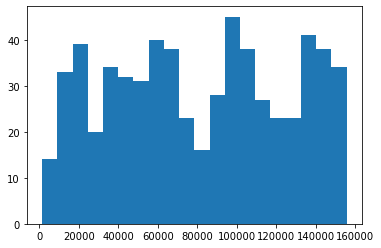

In [45]:
plot_character_hist(character_occurences, "elizabeth")

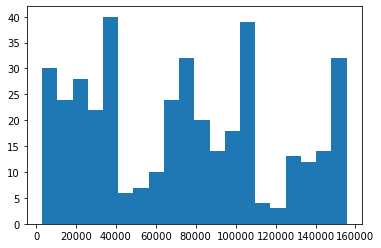

In [46]:
plot_character_hist(character_occurences, "darcy")

### Cumulative occurrences

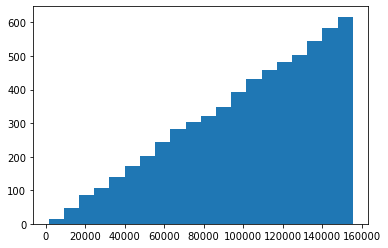

In [47]:
plot_character_hist(character_occurences, "elizabeth", cumulative=True)

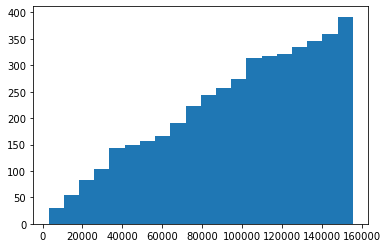

In [48]:
plot_character_hist(character_occurences, "darcy", cumulative=True)

### Spacy parse tree in action

[Hint](# "ent.subtree, token.pos_ == 'ADJ'") 

In [49]:
# Find words (adjectives) that describe Mr. Darcy.

def get_character_adjectives(doc, character_lemma):
    """
    Find all the adjectives related to `character_lemma` in `doc`
    
    :param doc: Spacy NLP parsed document
    :param character_lemma: string object
    :return: list of adjectives related to `character_lemma`
    """
    
    adjectives = []
    for ent in processed_text.ents:
        # your code here
        pass
    
     for ent in processed_text.ents:
        if ent.lemma_.lower() == character_lemma:
            if ent.root.dep_ == 'nsubj':
                for child in ent.root.head.children:
                    if child.dep_ == 'acomp':
                        adjectives.append(child.lemma_)
                        
    return adjectives

print(get_character_adjectives(processed_text, 'darcy'))

['grave', 'delighted', 'late', 'late', 'late', 'late', 'intimate', 'confidential', 'present', 'infamous', 'steward', 'superior', 'opposite', 'late', 'late', 'few', 'poor', 'last', 'clever', 'worth', 'grow', 'studious', 'sorry', 'unworthy', 'answerable', 'impatient', 'ashamed', 'kind', 'handsome', 'down', 'proud', 'tall', 'punctual', 'delighted', 'fond']


In [50]:
# Find words (adjectives) that describe Elizabeth.


print(get_character_adjectives(processed_text, 'elizabeth'))

['easy', 'unaffected', 'least', 'dear', 'young', 'dear', 'dear', 'dear', 'first', 'acute', 'dear', 'latter', 'lovely', 'more', 'glad', 'catch', 'surprised', 'surprised', 'deep', 'pleased', 'watchful', 'satisfied', 'prepared', 'equal', 'ready', 'thankful', 'surprised', 'surprised', 'eager', 'shocked', 'disappointed', 'distressed', 'delighted', 'rejoiced', 'sensible', 'prepared', 'pleased', 'relieve', 'pleased', 'pleased', 'surprised', 'sorry', 'surprised', 'disgust', 'glad', 'pleased', 'determined', 'more', 'embarrassed', 'acquainted']


For all the dependencies manual: https://nlp.stanford.edu/software/dependencies_manual.pdf

`acomp`: adjectival complement
*i.e.* an adjectival phrase which functions as the complement (like an object of the verb) e.g. "She looks very beautiful": *beautiful* is an adjectival complement of *looks*

`nsubj`: nominal subject
*i.e.* a noun phrase which is the syntactic subject of a clause. The head of this relation
might not always be a verb: when the verb is a copular verb, the root of the clause is the complement of
the copular verb, which can be an adjective or noun.
*e.g.* "Clinton defeated Dole". The relationship is *nsubj(defeated, Clinton)*

"The baby is cute". The relationship is *nsubj(cute, baby)*.

In the code, `.dep_`stands for syntactic dependency, *i.e.* the relation between tokens.

In [51]:
processed_text.ents[30].root.dep_

'pobj'

[Hint](# "ent.label_, ent.root.head.lemma_") 

In [89]:
# Find characters that are 'talking', 'saying', 'doing' the most. Find the relationship between 
# entities and corresponding root verbs.

character_verb_counter = Counter()


for ent in doc2.ents:
    if # your code here:
        character_verb_counter[ent.text] += 1

print(character_verb_counter.most_common(10)) 

# do the same for talking and doing

print(character_verb_counter.most_common(10)) 


SyntaxError: invalid syntax (4161498772.py, line 8)

[Hint](# "ent.label_, ent.root.head.pos_") 

In [75]:
# Find 20 most used verbs
verb_counter = Counter()

# your code here

print(verb_counter.most_common(20))

[('say', 159), ('be', 113), ('have', 67), ('see', 54), ('cry', 49), ('reply', 48), ('look', 30), ('make', 24), ('leave', 24), ('come', 23), ('think', 23), ('go', 18), ('begin', 17), ('give', 17), ('do', 16), ('tell', 16), ('take', 16), ('feel', 15), ('know', 15), ('marry', 15)]


In [76]:
# Create a dataframe with the most used verb and how many time a character used the verb

import pandas as pd
verb_characters = {}
verb_list = [verb[0] for verb in verb_counter.most_common(20)]
for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ in verb_list:
        # complete the code
        pass


In [79]:
df = pd.DataFrame(verb_characters).transpose().fillna(0)
df

,Bennet,Elizabeth,Charlotte,Darcy,Wickham,Miss Bingley,Jane,Collins,William,Fitzwilliam,...,F.,Hill,Lydia Bennet,Sarah,Miss Bingley\n,Eliza Bennet,Lydia,Bakewell,Brighton,Lucas
reply,3.0,18.0,2.0,7.0,4.0,1.0,7.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
be,33.0,54.0,0.0,42.0,17.0,4.0,27.0,15.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
make,2.0,8.0,0.0,2.0,1.0,1.0,3.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
say,28.0,46.0,3.0,13.0,4.0,9.0,14.0,3.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
see,2.0,16.0,1.0,8.0,4.0,3.0,7.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
have,8.0,18.0,0.0,6.0,6.0,0.0,6.0,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
do,0.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
come,0.0,0.0,0.0,4.0,1.0,1.0,2.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
cry,3.0,24.0,0.0,3.0,1.0,3.0,6.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feel,0.0,12.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
# drop the less meaningful columns
df = df[df.columns[df.sum()>=10]].sort_index()
df

,Bennet,Elizabeth,Darcy,Wickham,Miss Bingley,Jane,Collins,William,Fitzwilliam,Gardiner,Bingley,Lizzy,Lady Catherine
be,33.0,54.0,42.0,17.0,4.0,27.0,15.0,5.0,3.0,4.0,17.0,11.0,9.0
begin,1.0,3.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0
come,0.0,0.0,4.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0
cry,3.0,24.0,3.0,1.0,3.0,6.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0
do,0.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,2.0,2.0,1.0
feel,0.0,12.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
give,3.0,2.0,3.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,3.0,0.0
go,2.0,4.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
have,8.0,18.0,6.0,6.0,0.0,6.0,5.0,1.0,0.0,0.0,3.0,5.0,2.0
know,0.0,3.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,2.0,0.0


,Bennet,Elizabeth,Darcy,Wickham,Miss Bingley,Jane,Collins,William,Fitzwilliam,Gardiner,Bingley,Lizzy,Lady Catherine
be,33.000000,54.000000,42.000000,17.000000,4.000000,27.000000,15.000000,5.000000,3.000000,4.000000,17.000000,11.000000,9.000000
begin,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
come,0.000000,0.000000,4.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
cry,3.000000,24.000000,3.000000,1.000000,3.000000,6.000000,2.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000
do,0.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,2.000000,1.000000
feel,0.000000,12.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
give,3.000000,2.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000,0.000000
go,2.000000,4.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
have,8.000000,18.000000,6.000000,6.000000,0.000000,6.000000,5.000000,1.000000,0.000000,0.000000,3.000000,5.000000,2.000000
know,0.000000,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,2.000000,0.000000


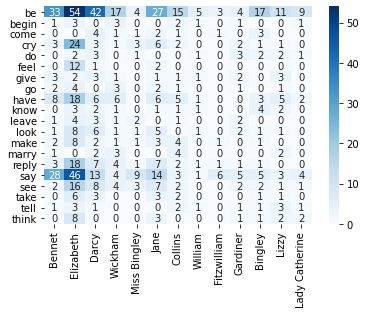

<IPython.core.display.Javascript object>

In [95]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df, annot=True, cmap='Blues')
df.style.background_gradient(cmap='Blues')
